# Preprocessing Soil Data

In [6]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr
import os

## Loading the Data

In [8]:
filepath = processed_files["soil_nc"]

ds = xr.open_dataset(filepath)

print(ds)


<xarray.Dataset> Size: 953MB
Dimensions:        (y: 2233, x: 2480)
Coordinates:
  * x              (x) float64 20kB -8.675 -8.667 -8.658 ... 11.97 11.98 11.99
  * y              (y) float64 18kB 37.57 37.56 37.55 ... 18.98 18.97 18.96
Data variables: (12/22)
    COARSE         (y, x) float64 44MB ...
    SAND           (y, x) float64 44MB ...
    SILT           (y, x) float64 44MB ...
    CLAY           (y, x) float64 44MB ...
    BULK           (y, x) float64 44MB ...
    REF_BULK       (y, x) float64 44MB ...
    ...             ...
    ESP            (y, x) float64 44MB ...
    TCARBON_EQ     (y, x) float64 44MB ...
    GYPSUM         (y, x) float64 44MB ...
    ELEC_COND      (y, x) float64 44MB ...
    TEXTURE_USDA   (y, x) float64 44MB ...
    TEXTURE_SOTER  (y, x) <U1 22MB ...
Attributes:
    crs:          | 0.01, 0.00,-8.67|\n| 0.00,-0.01, 37.57|\n| 0.00, 0.00, 1.00|
    description:  Rasterized HWSD attributes (only raster-covered pixels)


In [9]:
df = ds.to_dataframe().reset_index()
df

,y,x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,37.566667,-8.675000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,37.566667,-8.666663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,37.566667,-8.658327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,37.566667,-8.649990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,37.566667,-8.641653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537835,18.958333,11.958320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5537836,18.958333,11.966657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5537837,18.958333,11.974993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5537838,18.958333,11.983330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [10]:
df.describe()

,y,x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA
count,5.537840e+06,5.537840e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,1.939834e+06,3.279885e+06,3.279885e+06,...,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,3.279885e+06,2.514688e+06
mean,2.826250e+01,1.658333e+00,7.495417e+00,3.653834e+01,1.791576e+01,1.046305e+01,-1.689526e-01,1.660326e+00,-6.459643e-01,4.151463e+00,...,4.019963e+01,2.237688e+01,2.034171e+01,6.129960e+01,-1.097951e+00,2.237879e+00,4.661400e+00,1.605115e+00,-2.814987e-02,9.775798e+00
std,5.374170e+00,5.968359e+00,7.110316e+00,2.477592e+01,1.426159e+01,9.780299e+00,2.170476e+00,8.361252e-02,1.905740e+00,4.815925e+00,...,2.884484e+01,2.076431e+01,2.075713e+01,4.128362e+01,1.741327e+00,6.755550e+00,5.938299e+00,6.396854e+00,2.899263e+00,1.670320e+00
min,1.895833e+01,-8.675000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,1.200000e+00,-9.000000e+00,-9.000000e+00,...,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,3.000000e+00
25%,2.361042e+01,-3.508333e+00,3.100000e+00,2.445000e+01,9.000000e+00,4.500000e+00,-8.150000e-01,1.624000e+00,-1.180150e+00,2.200000e+00,...,1.600000e+01,9.750000e+00,3.500000e+00,3.050000e+01,-1.500000e+00,0.000000e+00,0.000000e+00,-1.350000e+00,-1.000000e+00,9.000000e+00
50%,2.826250e+01,1.658333e+00,8.880000e+00,4.675000e+01,2.520000e+01,1.500000e+01,1.410000e+00,1.649000e+00,5.969000e-01,7.640000e+00,...,5.100000e+01,2.925000e+01,2.400000e+01,8.200000e+01,0.000000e+00,2.500000e+00,6.420000e+00,2.700000e-01,1.000000e+00,1.100000e+01
75%,3.291458e+01,6.825000e+00,1.400000e+01,5.750000e+01,2.880000e+01,1.620000e+01,1.435000e+00,1.668000e+00,6.500000e-01,7.800000e+00,...,6.680000e+01,3.150000e+01,3.040000e+01,9.910000e+01,0.000000e+00,3.200000e+00,9.920000e+00,3.260000e+00,1.100000e+00,1.100000e+01
max,3.756667e+01,1.199167e+01,3.760000e+01,9.000000e+01,4.520000e+01,5.500000e+01,1.760000e+00,2.030000e+00,4.192600e+00,8.600000e+00,...,8.300000e+01,1.430000e+02,1.430000e+02,1.000000e+02,2.400000e+01,6.700000e+01,2.706000e+01,5.760000e+01,3.200000e+01,1.200000e+01


In [11]:
ds.close()

In [12]:
df.rename(columns={'x': 'longitude', 'y': 'latitude'}, inplace=True)

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537840 entries, 0 to 5537839
Data columns (total 24 columns):
 #   Column         Dtype  
---  ------         -----  
 0   latitude       float64
 1   longitude      float64
 2   COARSE         float64
 3   SAND           float64
 4   SILT           float64
 5   CLAY           float64
 6   BULK           float64
 7   REF_BULK       float64
 8   ORG_CARBON     float64
 9   PH_WATER       float64
 10  TOTAL_N        float64
 11  CN_RATIO       float64
 12  CEC_SOIL       float64
 13  CEC_CLAY       float64
 14  CEC_EFF        float64
 15  TEB            float64
 16  BSAT           float64
 17  ALUM_SAT       float64
 18  ESP            float64
 19  TCARBON_EQ     float64
 20  GYPSUM         float64
 21  ELEC_COND      float64
 22  TEXTURE_USDA   float64
 23  TEXTURE_SOTER  object 
dtypes: float64(23), object(1)
memory usage: 1014.0+ MB


In [14]:
df.isna().sum() / df.shape[0]

latitude         0.000000
longitude        0.000000
COARSE           0.407732
SAND             0.407732
SILT             0.407732
CLAY             0.407732
BULK             0.407732
REF_BULK         0.649713
ORG_CARBON       0.407732
PH_WATER         0.407732
TOTAL_N          0.407732
CN_RATIO         0.407732
CEC_SOIL         0.407732
CEC_CLAY         0.407732
CEC_EFF          0.407732
TEB              0.407732
BSAT             0.407732
ALUM_SAT         0.407732
ESP              0.407732
TCARBON_EQ       0.407732
GYPSUM           0.407732
ELEC_COND        0.407732
TEXTURE_USDA     0.545908
TEXTURE_SOTER    0.000000
dtype: float64

## Clipping by latitude

In [15]:
import importlib
import config
importlib.reload(config)
from config import latitude_lower_bound


df = df[df['latitude'] > latitude_lower_bound]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3082640 entries, 0 to 3082639
Data columns (total 24 columns):
 #   Column         Dtype  
---  ------         -----  
 0   latitude       float64
 1   longitude      float64
 2   COARSE         float64
 3   SAND           float64
 4   SILT           float64
 5   CLAY           float64
 6   BULK           float64
 7   REF_BULK       float64
 8   ORG_CARBON     float64
 9   PH_WATER       float64
 10  TOTAL_N        float64
 11  CN_RATIO       float64
 12  CEC_SOIL       float64
 13  CEC_CLAY       float64
 14  CEC_EFF        float64
 15  TEB            float64
 16  BSAT           float64
 17  ALUM_SAT       float64
 18  ESP            float64
 19  TCARBON_EQ     float64
 20  GYPSUM         float64
 21  ELEC_COND      float64
 22  TEXTURE_USDA   float64
 23  TEXTURE_SOTER  object 
dtypes: float64(23), object(1)
memory usage: 588.0+ MB


In [17]:
df.isna().sum() / df.shape[0]

latitude         0.000000
longitude        0.000000
COARSE           0.365935
SAND             0.365935
SILT             0.365935
CLAY             0.365935
BULK             0.365935
REF_BULK         0.539157
ORG_CARBON       0.365935
PH_WATER         0.365935
TOTAL_N          0.365935
CN_RATIO         0.365935
CEC_SOIL         0.365935
CEC_CLAY         0.365935
CEC_EFF          0.365935
TEB              0.365935
BSAT             0.365935
ALUM_SAT         0.365935
ESP              0.365935
TCARBON_EQ       0.365935
GYPSUM           0.365935
ELEC_COND        0.365935
TEXTURE_USDA     0.518044
TEXTURE_SOTER    0.000000
dtype: float64

## Dropping values outside of borders

<Axes: xlabel='longitude', ylabel='latitude'>

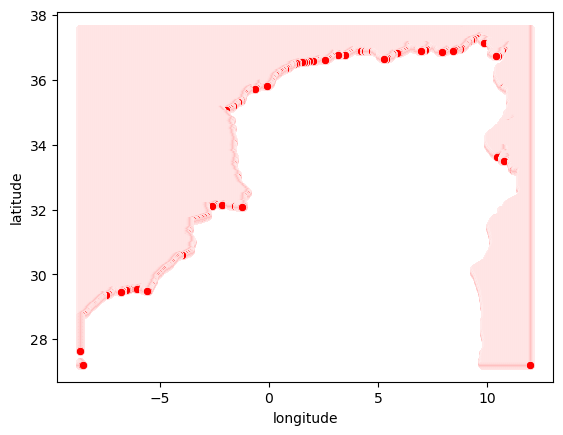

In [18]:
sns.scatterplot(df[df['COARSE'].isna()], x='longitude', y='latitude', color='r')

In [19]:
df = df[~df['COARSE'].isna()]
df.head()

,latitude,longitude,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
9554,37.541655,8.948773,6.6,54.6,22.2,23.2,1.386,1.620,1.4092,5.94,...,10.2,11.4,79.6,2.4,1.4,0.0,1.0,0.6,12.0,C
12030,37.533318,8.915426,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M
12031,37.533318,8.923763,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M
12032,37.533318,8.932100,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M
12033,37.533318,8.940436,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M


In [20]:
df.isna().sum() / df.shape[0]

latitude         0.000000
longitude        0.000000
COARSE           0.000000
SAND             0.000000
SILT             0.000000
CLAY             0.000000
BULK             0.000000
REF_BULK         0.273192
ORG_CARBON       0.000000
PH_WATER         0.000000
TOTAL_N          0.000000
CN_RATIO         0.000000
CEC_SOIL         0.000000
CEC_CLAY         0.000000
CEC_EFF          0.000000
TEB              0.000000
BSAT             0.000000
ALUM_SAT         0.000000
ESP              0.000000
TCARBON_EQ       0.000000
GYPSUM           0.000000
ELEC_COND        0.000000
TEXTURE_USDA     0.239895
TEXTURE_SOTER    0.000000
dtype: float64

## Handling Outliers

### `COARSE`

Since it's a percentage, valid values [0, 100]

<Axes: xlabel='longitude', ylabel='latitude'>

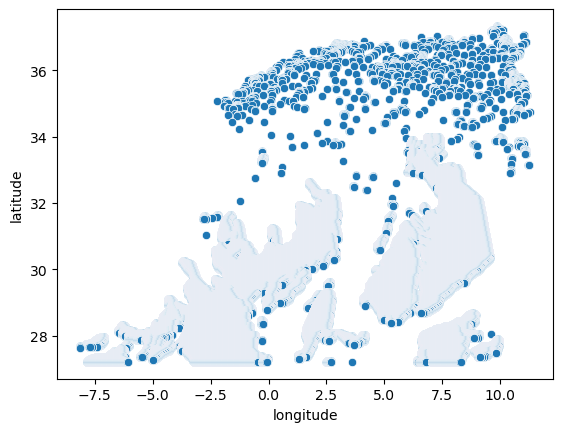

In [21]:
sns.scatterplot(df[df['COARSE'] < 0], x='longitude', y='latitude')

In [22]:
df.loc[df['COARSE'] < 0, 'COARSE'] = np.nan

In [23]:
df.isna().sum()

latitude              0
longitude             0
COARSE           468898
SAND                  0
SILT                  0
CLAY                  0
BULK                  0
REF_BULK         533980
ORG_CARBON            0
PH_WATER              0
TOTAL_N               0
CN_RATIO              0
CEC_SOIL              0
CEC_CLAY              0
CEC_EFF               0
TEB                   0
BSAT                  0
ALUM_SAT              0
ESP                   0
TCARBON_EQ            0
GYPSUM                0
ELEC_COND             0
TEXTURE_USDA     468898
TEXTURE_SOTER         0
dtype: int64

### Other Percentage Attributes

In [24]:
percent_attributes = [
    "COARSE", "SAND", "SILT", "CLAY",
    "ORG_CARBON", "TOTAL_N", "BSAT", "ALUM_SAT", "ESP",
    "TCARBON_EQ", "GYPSUM"
]

In [25]:
def clean_percent_attributes(df, percent_attributes):
    """
    Replace out-of-range values (<0 or >100) in percent attributes with NaN.
    """
    df = df.copy()
    for col in percent_attributes:
        if col in df.columns:
            invalid_mask = (df[col] < 0) | (df[col] > 100)
            n_invalid = invalid_mask.sum()
            if n_invalid > 0:
                print(f"{col}: {n_invalid} values outside [0, 100] set to NaN")
            df.loc[invalid_mask, col] = np.nan
    return df

In [26]:
df = clean_percent_attributes(df, percent_attributes)

SAND: 468898 values outside [0, 100] set to NaN
SILT: 468898 values outside [0, 100] set to NaN
CLAY: 468898 values outside [0, 100] set to NaN
ORG_CARBON: 533980 values outside [0, 100] set to NaN
TOTAL_N: 533980 values outside [0, 100] set to NaN
BSAT: 468898 values outside [0, 100] set to NaN
ALUM_SAT: 533980 values outside [0, 100] set to NaN
ESP: 474500 values outside [0, 100] set to NaN
TCARBON_EQ: 470141 values outside [0, 100] set to NaN
GYPSUM: 513168 values outside [0, 100] set to NaN


In [27]:
df.isna().sum()

latitude              0
longitude             0
COARSE           468898
SAND             468898
SILT             468898
CLAY             468898
BULK                  0
REF_BULK         533980
ORG_CARBON       533980
PH_WATER              0
TOTAL_N          533980
CN_RATIO              0
CEC_SOIL              0
CEC_CLAY              0
CEC_EFF               0
TEB                   0
BSAT             468898
ALUM_SAT         533980
ESP              474500
TCARBON_EQ       470141
GYPSUM           513168
ELEC_COND             0
TEXTURE_USDA     468898
TEXTURE_SOTER         0
dtype: int64

### Strictly Positive Attributes

In [28]:
positive_attributes = [
    "BULK",
    "REF_BULK",
    "PH_WATER",
    "CN_RATIO",
    "CEC_SOIL",
    "CEC_CLAY",
    "CEC_EFF",
    "TEB",
    "ELEC_COND"
]


In [29]:
def clean_positive_attributes(df, positive_attributes):
    """
    Replace negative or zero values in strictly positive attributes with NaN.
    """
    df = df.copy()
    for col in positive_attributes:
        if col in df.columns:
            invalid_mask = df[col] <= 0
            n_invalid = invalid_mask.sum()
            if n_invalid > 0:
                print(f"{col}: {n_invalid} non-positive values set to NaN")
            df.loc[invalid_mask, col] = np.nan
    return df

In [30]:
df = clean_positive_attributes(df, positive_attributes)

BULK: 533980 non-positive values set to NaN
PH_WATER: 468898 non-positive values set to NaN
CN_RATIO: 468898 non-positive values set to NaN
CEC_SOIL: 468898 non-positive values set to NaN
CEC_CLAY: 468898 non-positive values set to NaN
CEC_EFF: 468898 non-positive values set to NaN
TEB: 468898 non-positive values set to NaN
ELEC_COND: 573728 non-positive values set to NaN


In [31]:
df.isna().sum()

latitude              0
longitude             0
COARSE           468898
SAND             468898
SILT             468898
CLAY             468898
BULK             533980
REF_BULK         533980
ORG_CARBON       533980
PH_WATER         468898
TOTAL_N          533980
CN_RATIO         468898
CEC_SOIL         468898
CEC_CLAY         468898
CEC_EFF          468898
TEB              468898
BSAT             468898
ALUM_SAT         533980
ESP              474500
TCARBON_EQ       470141
GYPSUM           513168
ELEC_COND        573728
TEXTURE_USDA     468898
TEXTURE_SOTER         0
dtype: int64

### `TEXTURE_SOTER`

In [32]:
df['TEXTURE_SOTER'].value_counts()

TEXTURE_SOTER
M    1363914
-     486705
C      82480
F      21495
Name: count, dtype: int64

In [33]:
df.loc[df['TEXTURE_SOTER'] == '-', 'TEXTURE_SOTER'] = np.nan

In [34]:
df.isna().sum()

latitude              0
longitude             0
COARSE           468898
SAND             468898
SILT             468898
CLAY             468898
BULK             533980
REF_BULK         533980
ORG_CARBON       533980
PH_WATER         468898
TOTAL_N          533980
CN_RATIO         468898
CEC_SOIL         468898
CEC_CLAY         468898
CEC_EFF          468898
TEB              468898
BSAT             468898
ALUM_SAT         533980
ESP              474500
TCARBON_EQ       470141
GYPSUM           513168
ELEC_COND        573728
TEXTURE_USDA     468898
TEXTURE_SOTER    486705
dtype: int64

In [35]:
df.describe()

,latitude,longitude,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA
count,1.954594e+06,1.954594e+06,1.485696e+06,1.485696e+06,1.485696e+06,1.485696e+06,1.420614e+06,1.420614e+06,1.420614e+06,1.485696e+06,...,1.485696e+06,1.485696e+06,1.485696e+06,1.485696e+06,1.420614e+06,1.480094e+06,1.484453e+06,1.441426e+06,1.380866e+06,1.485696e+06
mean,3.154370e+01,3.100978e+00,1.135861e+01,5.136590e+01,2.879373e+01,1.767938e+01,1.426860e+00,1.667353e+00,7.811709e-01,7.575240e+00,...,5.848420e+01,3.518753e+01,3.278152e+01,9.016358e+01,9.914868e-02,4.976003e+00,9.089630e+00,3.744131e+00,1.756464e+00,9.059133e+00
std,2.793442e+00,4.670182e+00,4.000977e+00,1.092395e+01,6.199229e+00,5.902416e+00,4.015247e-02,9.533255e-02,3.763616e-01,1.100066e+00,...,1.174781e+01,1.561905e+01,1.628813e+01,1.157582e+01,9.801599e-01,8.167136e+00,3.519565e+00,7.039800e+00,2.639594e+00,1.790832e+00
min,2.721203e+01,-8.675000e+00,2.000000e+00,1.300000e+01,5.000000e+00,4.000000e+00,1.110000e+00,1.200000e+00,2.550000e-01,1.690000e+00,...,1.600000e+01,3.000000e+00,3.000000e+00,2.860000e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-02,1.000000e-01,3.000000e+00
25%,2.904618e+01,-2.132547e-01,9.000000e+00,4.700000e+01,2.750000e+01,1.500000e+01,1.410000e+00,1.620000e+00,6.256000e-01,7.740000e+00,...,5.100000e+01,3.050000e+01,2.400000e+01,8.200000e+01,0.000000e+00,2.500000e+00,6.870000e+00,2.500000e-01,1.000000e+00,9.000000e+00
50%,3.130553e+01,3.454891e+00,1.200000e+01,5.360000e+01,2.960000e+01,1.620000e+01,1.428000e+00,1.650000e+00,6.782000e-01,7.800000e+00,...,5.950000e+01,3.150000e+01,3.030000e+01,9.260000e+01,0.000000e+00,2.700000e+00,1.010000e+01,1.470000e+00,1.000000e+00,9.000000e+00
75%,3.392337e+01,6.972976e+00,1.500000e+01,5.750000e+01,3.220000e+01,1.800000e+01,1.448000e+00,1.690000e+00,7.040000e-01,8.000000e+00,...,6.980000e+01,3.520000e+01,3.300000e+01,9.910000e+01,0.000000e+00,4.200000e+00,1.130000e+01,4.000000e+00,1.300000e+00,1.100000e+01
max,3.754166e+01,1.159984e+01,3.760000e+01,9.000000e+01,4.520000e+01,5.500000e+01,1.760000e+00,2.030000e+00,4.192600e+00,8.600000e+00,...,8.300000e+01,1.430000e+02,1.430000e+02,1.000000e+02,2.400000e+01,6.700000e+01,2.706000e+01,5.760000e+01,3.200000e+01,1.200000e+01


In [30]:
df.to_csv('../../data/pre-merge/soil.csv', index=False)